In [1]:
import tensorflow as tf
from pandas import read_csv
from pandas import datetime
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
import matplotlib.pyplot as plt


C:\ProgramData\Anaconda3\envs\ml_env\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


        Date  Monthly Mean Total Sunspot Number
0 1749-01-31                               96.7
1 1749-02-28                              104.3
2 1749-03-31                              116.7
3 1749-04-30                               92.8
4 1749-05-31                              141.7
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3235 entries, 0 to 3234
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               3235 non-null   datetime64[ns]
 1   Monthly Mean Total Sunspot Number  3235 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 75.8 KB


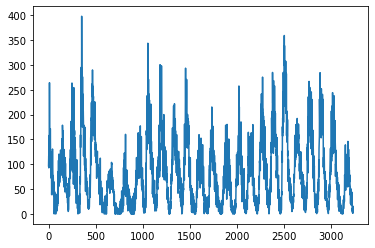

In [2]:
def parser(x):
    return datetime.strptime(str(x), '%Y-%m-%d')
series = read_csv('Sunspots.csv', header=0, parse_dates=[1], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.info()
series['Monthly Mean Total Sunspot Number'].plot()
pyplot.show()

In [3]:
!pip install statsmodels

In [4]:
from statsmodels.graphics.tsaplots import plot_acf

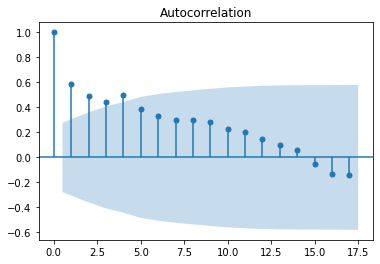

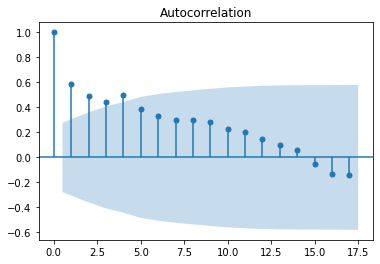

In [5]:
plot_acf(series['Monthly Mean Total Sunspot Number'][:50])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

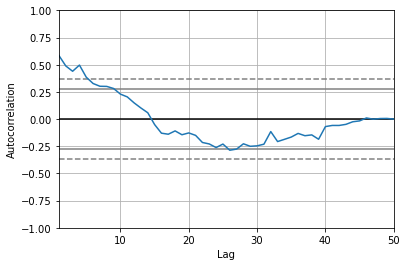

In [6]:
autocorrelation_plot(series['Monthly Mean Total Sunspot Number'][:50])

In [7]:
from statsmodels.tsa.arima.model import ARIMA

In [8]:
# load dataset
def parser(x):
    return datetime.strptime(str(x), '%Y-%m-%d')
series = read_csv('Sunspots.csv', header=0, parse_dates=[1], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
# series.index = series.index.to_period('M')


        Date  Monthly Mean Total Sunspot Number
0 1749-01-31                               96.7
1 1749-02-28                              104.3
2 1749-03-31                              116.7
3 1749-04-30                               92.8
4 1749-05-31                              141.7


C:\ProgramData\Anaconda3\envs\ml_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# fit model
model = ARIMA(series['Monthly Mean Total Sunspot Number'], order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())


                                       SARIMAX Results                                       
Dep. Variable:     Monthly Mean Total Sunspot Number   No. Observations:                 3235
Model:                                ARIMA(5, 1, 0)   Log Likelihood              -15032.215
Date:                               Thu, 15 Apr 2021   AIC                          30076.429
Time:                                       12:47:30   BIC                          30112.918
Sample:                                            0   HQIC                         30089.504
                                              - 3235                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4152      0.013    -30.825      0.000      -0.442      -0.389
ar.L2      

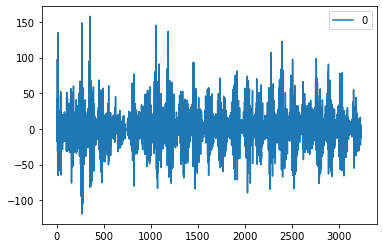

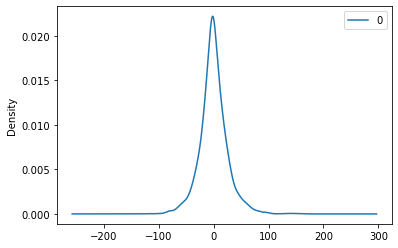

                 0
count  3235.000000
mean     -0.028386
std      25.316808
min    -119.173124
25%     -13.225754
50%      -0.962669
75%      12.534336
max     158.047098


In [10]:
from pandas import DataFrame
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [12]:
# split into train and test sets
X = series['Monthly Mean Total Sunspot Number'].values
size = 3000
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# # evaluate forecasts
# rmse = sqrt(mean_squared_error(test, predictions))
# print('Test RMSE: %.3f' % rmse)
# # plot forecasts against actual outcomes
# pyplot.plot(test)
# pyplot.plot(predictions, color='red')
# pyplot.show()

predicted=112.679062, expected=86.000000
predicted=94.588381, expected=98.000000
predicted=99.707870, expected=103.500000
predicted=100.890163, expected=93.600000
predicted=95.796548, expected=149.600000
predicted=128.818695, expected=207.200000
predicted=167.552926, expected=173.500000
predicted=160.192614, expected=142.300000
predicted=148.280803, expected=106.300000
predicted=127.406142, expected=168.700000
predicted=159.496161, expected=188.300000
predicted=174.619615, expected=116.800000
predicted=133.850465, expected=133.100000
predicted=139.094674, expected=165.700000
predicted=155.881937, expected=217.700000
predicted=189.366762, expected=191.500000
predicted=183.042309, expected=165.900000
predicted=169.303890, expected=188.000000
predicted=184.411470, expected=244.300000
predicted=219.237645, expected=180.500000
predicted=190.012065, expected=156.000000
predicted=172.916358, expected=141.600000
predicted=160.885960, expected=158.100000
predicted=163.685579, expected=143.30000

predicted=64.576714, expected=58.000000
predicted=61.861392, expected=57.000000
predicted=59.552729, expected=56.400000
predicted=58.854011, expected=54.100000
predicted=55.935224, expected=37.900000
predicted=45.788445, expected=51.500000
predicted=51.260339, expected=20.500000
predicted=32.844483, expected=32.400000
predicted=35.689524, expected=50.200000
predicted=45.146344, expected=44.600000
predicted=41.456265, expected=33.400000
predicted=36.880801, expected=21.400000
predicted=28.356744, expected=18.500000
predicted=24.985805, expected=26.100000
predicted=27.670323, expected=26.400000
predicted=26.468873, expected=17.700000
predicted=20.719240, expected=32.300000
predicted=28.196571, expected=18.900000
predicted=21.368096, expected=19.200000
predicted=20.972783, expected=17.800000
predicted=20.078624, expected=32.600000
predicted=27.233785, expected=43.700000
predicted=35.759895, expected=13.200000
predicted=19.705053, expected=5.700000
predicted=14.295481, expected=8.200000
pr

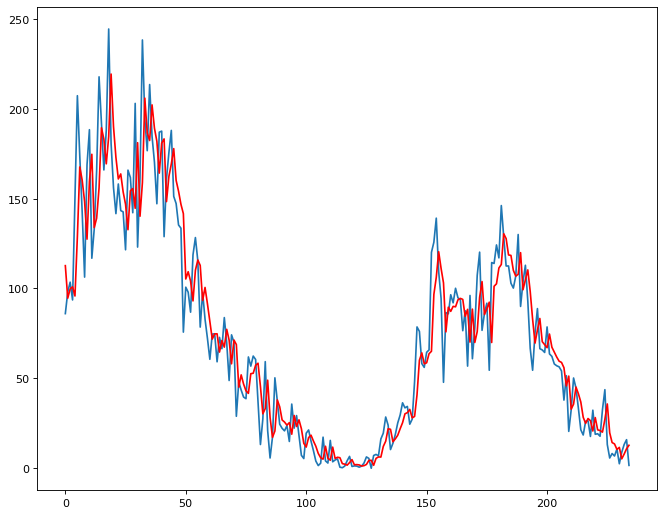

In [13]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=80)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [14]:
# evaluate forecasts
mae = mean_absolute_error(test, predictions)
print("ARIMA model의 mae는 ", mae)

ARIMA model의 mae는  14.60870673043452


In [15]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [16]:
import csv
import numpy as np
time_step = []
sunspots = []

with open('sunspots.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        sunspots.append(float(row[2]))
        time_step.append(int(row[0]))

series = np.array(sunspots)
time = np.array(time_step)

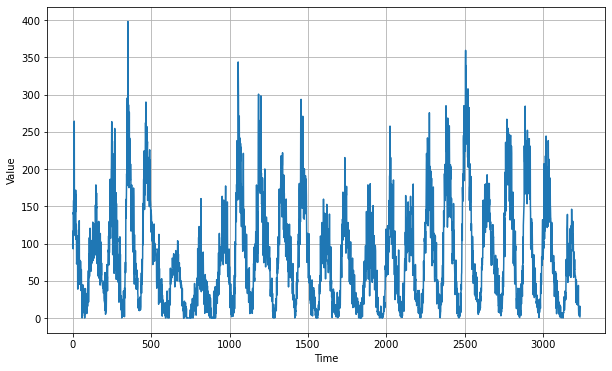

In [17]:
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [18]:
split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]



In [19]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [20]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [21]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
learning_rate = 1e-8
shuffle_buffer_size = 1000
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])


<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>
(3000,)


C:\Users\eungu\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:382: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
12/12 [==============================] - 7s 255ms/step - loss: 77.0308 - mae: 77.5277
Epoch 2/100
12/12 [==============================] - 3s 228ms/step - loss: 75.8295 - mae: 76.3264
Epoch 3/100
12/12 [==============================] - 3s 259ms/step - loss: 73.8409 - mae: 74.3386
Epoch 4/100
12/12 [==============================] - 3s 229ms/step - loss: 70.0323 - mae: 70.5301
Epoch 5/100
12/12 [==============================] - 3s 262ms/step - loss: 66.1753 - mae: 66.6732
Epoch 6/100
12/12 [==============================] - 3s 251ms/step - loss: 62.9767 - mae: 63.4739
Epoch 7/100
12/12 [==============================] - 3s 238ms/step - loss: 59.8143 - mae: 60.3113
Epoch 8/100
12/12 [==============================] - 3s 271ms/step - loss: 56.0738 - mae: 56.5700
Epoch 9/100
12/12 [==============================] - 3s 228ms/step - loss: 52.7464 - mae: 53.2425
Epoch 10/100
12/12 [==============================] - 3s 269ms/step - loss: 50.9452 - mae: 51.4415
Epoch 11/100
12/12 

12/12 [==============================] - 3s 233ms/step - loss: 52.8585 - mae: 53.3563
Epoch 84/100
12/12 [==============================] - 3s 266ms/step - loss: 42.1428 - mae: 42.6398
Epoch 85/100
12/12 [==============================] - 3s 236ms/step - loss: 60.1118 - mae: 60.6105
Epoch 86/100
12/12 [==============================] - 3s 247ms/step - loss: 38.4207 - mae: 38.9170
Epoch 87/100
12/12 [==============================] - 3s 266ms/step - loss: 53.1134 - mae: 53.6118
Epoch 88/100
12/12 [==============================] - 3s 233ms/step - loss: 50.1591 - mae: 50.6577
Epoch 89/100
12/12 [==============================] - 4s 292ms/step - loss: 46.5724 - mae: 47.0693
Epoch 90/100
12/12 [==============================] - 3s 233ms/step - loss: 46.1981 - mae: 46.6958
Epoch 91/100
12/12 [==============================] - 3s 283ms/step - loss: 61.2672 - mae: 61.7656
Epoch 92/100
12/12 [==============================] - 3s 240ms/step - loss: 42.8871 - mae: 43.3844
Epoch 93/100
12/12 [===

(1e-08, 0.0001, 0.0, 60.0)

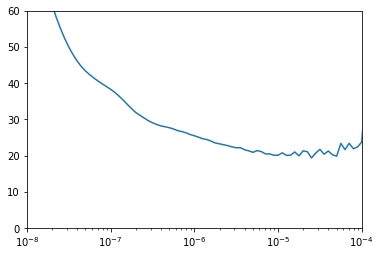

In [22]:
# learning rate 확인
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

In [23]:
window_size = 60
batch_size = 100
shuffle_buffer_size = 1000
learning_rate = 1e-5

In [24]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=500)

Epoch 1/500
30/30 [==============================] - 8s 137ms/step - loss: 47.7137 - mae: 48.2109
Epoch 2/500
30/30 [==============================] - 4s 118ms/step - loss: 26.8709 - mae: 27.3659
Epoch 3/500
30/30 [==============================] - 4s 136ms/step - loss: 22.9803 - mae: 23.4748
Epoch 4/500
30/30 [==============================] - 4s 120ms/step - loss: 20.2753 - mae: 20.7687
Epoch 5/500
30/30 [==============================] - 4s 135ms/step - loss: 19.2632 - mae: 19.7555
Epoch 6/500
30/30 [==============================] - 4s 131ms/step - loss: 19.6766 - mae: 20.1690
Epoch 7/500
30/30 [==============================] - 4s 132ms/step - loss: 18.6152 - mae: 19.1073
Epoch 8/500
30/30 [==============================] - 4s 138ms/step - loss: 17.9377 - mae: 18.4289
Epoch 9/500
30/30 [==============================] - 4s 119ms/step - loss: 17.8670 - mae: 18.3582
Epoch 10/500
30/30 [==============================] - 4s 143ms/step - loss: 17.8231 - mae: 18.3140
Epoch 11/500
30/30 

30/30 [==============================] - 4s 118ms/step - loss: 16.1561 - mae: 16.6442
Epoch 84/500
30/30 [==============================] - 4s 143ms/step - loss: 16.2403 - mae: 16.7280
Epoch 85/500
30/30 [==============================] - 4s 130ms/step - loss: 16.1588 - mae: 16.6467
Epoch 86/500
30/30 [==============================] - 5s 145ms/step - loss: 16.5978 - mae: 17.0857
Epoch 87/500
30/30 [==============================] - 4s 138ms/step - loss: 16.6477 - mae: 17.1366
Epoch 88/500
30/30 [==============================] - 4s 133ms/step - loss: 16.2248 - mae: 16.7128
Epoch 89/500
30/30 [==============================] - 5s 148ms/step - loss: 16.4498 - mae: 16.9378
Epoch 90/500
30/30 [==============================] - 4s 125ms/step - loss: 16.1551 - mae: 16.6433
Epoch 91/500
30/30 [==============================] - 5s 152ms/step - loss: 16.0902 - mae: 16.5782
Epoch 92/500
30/30 [==============================] - 4s 128ms/step - loss: 16.0851 - mae: 16.5725
Epoch 93/500
30/30 [===

30/30 [==============================] - 4s 126ms/step - loss: 15.5796 - mae: 16.0672
Epoch 166/500
30/30 [==============================] - 4s 122ms/step - loss: 15.7217 - mae: 16.2095
Epoch 167/500
30/30 [==============================] - 4s 136ms/step - loss: 15.6266 - mae: 16.1146
Epoch 168/500
30/30 [==============================] - 4s 121ms/step - loss: 15.6392 - mae: 16.1271
Epoch 169/500
30/30 [==============================] - 4s 129ms/step - loss: 15.5106 - mae: 15.9982
Epoch 170/500
30/30 [==============================] - 4s 124ms/step - loss: 15.5663 - mae: 16.0537
Epoch 171/500
30/30 [==============================] - 4s 130ms/step - loss: 15.6147 - mae: 16.1021
Epoch 172/500
30/30 [==============================] - 4s 119ms/step - loss: 15.7043 - mae: 16.1923
Epoch 173/500
30/30 [==============================] - 4s 137ms/step - loss: 15.6937 - mae: 16.1814
Epoch 174/500
30/30 [==============================] - 4s 117ms/step - loss: 15.7191 - mae: 16.2067
Epoch 175/500


30/30 [==============================] - 4s 116ms/step - loss: 14.9698 - mae: 15.4560
Epoch 248/500
30/30 [==============================] - 4s 137ms/step - loss: 15.2509 - mae: 15.7377
Epoch 249/500
30/30 [==============================] - 4s 113ms/step - loss: 15.1971 - mae: 15.6842
Epoch 250/500
30/30 [==============================] - 4s 141ms/step - loss: 15.3818 - mae: 15.8695
Epoch 251/500
30/30 [==============================] - 4s 115ms/step - loss: 15.2989 - mae: 15.7854
Epoch 252/500
30/30 [==============================] - 4s 140ms/step - loss: 15.4132 - mae: 15.8998
Epoch 253/500
30/30 [==============================] - 3s 113ms/step - loss: 15.0944 - mae: 15.5805
Epoch 254/500
30/30 [==============================] - 4s 138ms/step - loss: 15.1859 - mae: 15.6722
Epoch 255/500
30/30 [==============================] - 4s 114ms/step - loss: 15.1564 - mae: 15.6428
Epoch 256/500
30/30 [==============================] - 4s 139ms/step - loss: 15.0592 - mae: 15.5453
Epoch 257/500


30/30 [==============================] - 4s 128ms/step - loss: 14.8865 - mae: 15.3713
Epoch 330/500
30/30 [==============================] - 4s 126ms/step - loss: 14.8657 - mae: 15.3509
Epoch 331/500
30/30 [==============================] - 4s 129ms/step - loss: 14.8465 - mae: 15.3321
Epoch 332/500
30/30 [==============================] - 4s 120ms/step - loss: 14.7943 - mae: 15.2792
Epoch 333/500
30/30 [==============================] - 4s 134ms/step - loss: 15.0300 - mae: 15.5157
Epoch 334/500
30/30 [==============================] - 4s 119ms/step - loss: 14.9070 - mae: 15.3933
Epoch 335/500
30/30 [==============================] - 4s 135ms/step - loss: 14.8045 - mae: 15.2888
Epoch 336/500
30/30 [==============================] - 4s 114ms/step - loss: 14.8789 - mae: 15.3642
Epoch 337/500
30/30 [==============================] - 4s 143ms/step - loss: 15.0049 - mae: 15.4909
Epoch 338/500
30/30 [==============================] - 3s 113ms/step - loss: 14.7975 - mae: 15.2818
Epoch 339/500


30/30 [==============================] - 4s 131ms/step - loss: 14.5990 - mae: 15.0830
Epoch 412/500
30/30 [==============================] - 4s 124ms/step - loss: 14.5928 - mae: 15.0769
Epoch 413/500
30/30 [==============================] - 4s 130ms/step - loss: 14.5106 - mae: 14.9945
Epoch 414/500
30/30 [==============================] - 4s 122ms/step - loss: 14.4695 - mae: 14.9530
Epoch 415/500
30/30 [==============================] - 4s 127ms/step - loss: 14.8686 - mae: 15.3534
Epoch 416/500
30/30 [==============================] - 4s 123ms/step - loss: 14.6574 - mae: 15.1428
Epoch 417/500
30/30 [==============================] - 4s 128ms/step - loss: 14.7456 - mae: 15.2305
Epoch 418/500
30/30 [==============================] - 4s 127ms/step - loss: 14.5612 - mae: 15.0454
Epoch 419/500
30/30 [==============================] - 4s 121ms/step - loss: 14.5318 - mae: 15.0159
Epoch 420/500
30/30 [==============================] - 4s 130ms/step - loss: 14.6440 - mae: 15.1281
Epoch 421/500


30/30 [==============================] - 4s 115ms/step - loss: 14.1620 - mae: 14.6453
Epoch 494/500
30/30 [==============================] - 4s 141ms/step - loss: 14.2911 - mae: 14.7753
Epoch 495/500
30/30 [==============================] - 4s 114ms/step - loss: 14.3160 - mae: 14.7997
Epoch 496/500
30/30 [==============================] - 4s 141ms/step - loss: 14.3168 - mae: 14.8017
Epoch 497/500
30/30 [==============================] - 4s 124ms/step - loss: 14.4028 - mae: 14.8869
Epoch 498/500
30/30 [==============================] - 5s 151ms/step - loss: 14.2034 - mae: 14.6870
Epoch 499/500
30/30 [==============================] - 4s 117ms/step - loss: 14.3038 - mae: 14.7880
Epoch 500/500
30/30 [==============================] - 4s 134ms/step - loss: 14.4615 - mae: 14.9463


In [25]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

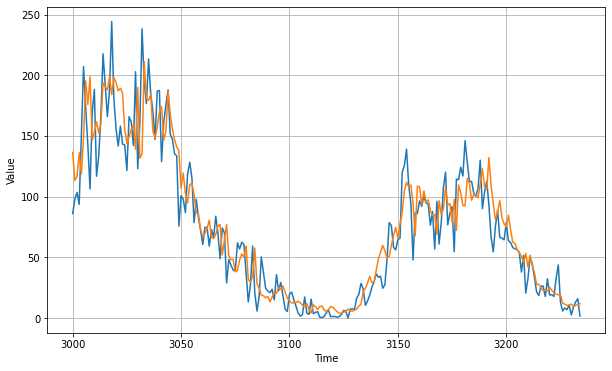

In [26]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [27]:
rnn_mae = tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()
print("RNN model의 mae는 ", rnn_mae)

RNN model의 mae는  15.388036
